<a href="https://colab.research.google.com/github/wraseonyana/Omdena/blob/master/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Sentiment Analysis
 Performed sentiment analysis on students debt tweets for a year with an attempt to quantify the total properties of a text dataset. This is done using the [TextBlob](http://textblob.readthedocs.io/en/dev/) library.


importing libraries 

In [0]:
import numpy as np
import pandas as pd

from IPython.display import display
import matplotlib.pyplot as plt

from textblob import TextBlob

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
datafile = '/content/drive/My Drive/Colab Notebooks/Twitter_Data.csv'
raw_data = pd.read_csv(datafile, parse_dates=[1], infer_datetime_format=True)

reindexed_data = raw_data['Text']
reindexed_data.index = raw_data['Datetime']



raw_data.head()

,Unnamed: 0,Datetime,Text
0,0,2019-12-29 22:54:15+00:00,Say Cheese! #studentdebt #healthcare #military...
1,1,2019-12-29 20:20:41+00:00,My 1st FEC deadline is Tuesday. I need you to ...
2,2,2019-12-29 19:12:37+00:00,Finally finished publishing FREEDOM THINKING F...
3,3,2019-12-29 18:45:28+00:00,"tuition, books, subsistence allowance OK #stud..."
4,4,2019-12-29 17:21:55+00:00,I Killed My Teenager’s Fancy College Dreams. Y...


## Analysing the Corpus
Run the TextBlob sentiment function on every tweet, and use it to construct a new series for both subjectivity and polarity.

In [0]:
blobs = [TextBlob(reindexed_data[i]) for i in range(reindexed_data.shape[0])]

polarity = [blob.polarity for blob in blobs]
subjectivity = [blob.subjectivity for blob in blobs]

sentiment_analysed = pd.DataFrame({'tweet_text':reindexed_data, 
                                   'polarity':polarity, 
                                   'subjectivity':subjectivity},
                                  index=reindexed_data.index)



In [5]:
sentiment_analysed.head()

,tweet_text,polarity,subjectivity
Datetime,,,
2019-12-29 22:54:15+00:00,Say Cheese! #studentdebt #healthcare #military...,0.000000,0.0000
2019-12-29 20:20:41+00:00,My 1st FEC deadline is Tuesday. I need you to ...,0.000000,1.0000
2019-12-29 19:12:37+00:00,Finally finished publishing FREEDOM THINKING F...,0.189394,0.4375
2019-12-29 18:45:28+00:00,"tuition, books, subsistence allowance OK #stud...",0.500000,0.5000
2019-12-29 17:21:55+00:00,I Killed My Teenager’s Fancy College Dreams. Y...,-0.200000,0.0000


Examine the average values per month and per year. This is done because individual tweet values for polarity and subjectivity are likely to be highly noisy.

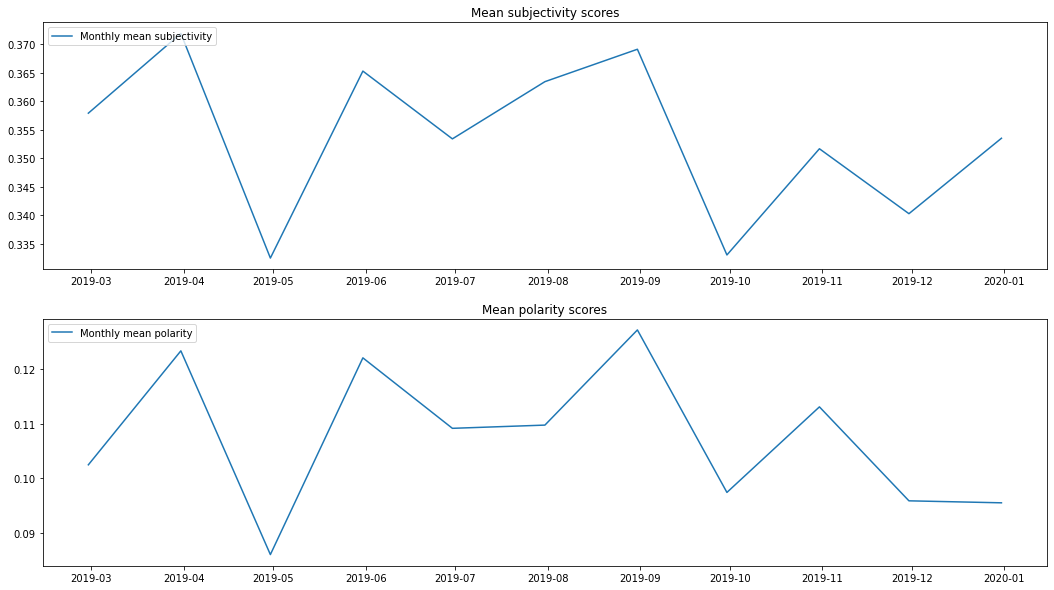

In [6]:
monthly_averages = sentiment_analysed.resample('M').mean()
#yearly_averages = sentiment_analysed.resample('A').mean()

fig, ax = plt.subplots(2, figsize=(18,10))
ax[0].plot(monthly_averages['subjectivity'], label='Monthly mean subjectivity');
#ax[0].plot(yearly_averages['subjectivity'], 'r--', label='Yearly mean subjectivity');
ax[0].set_title('Mean subjectivity scores');
ax[0].legend(loc='upper left');
ax[1].plot(monthly_averages['polarity'], label='Monthly mean polarity');
#ax[1].plot(yearly_averages['polarity'], 'r--', label='Yearly mean polarity');
ax[1].set_title('Mean polarity scores');
ax[1].legend(loc='upper left');
plt.show()

There are distinct changes across both series: the tweets however have lower mean subjectivity and polarity scores in May 2019. This significant  drop is also evident in October 2019. So the question becomes what activities happen on these months which lead to this? It will also be interesting look at tweets from another and compare to see if the same behaviuor will be displayed around these months. 